In [1]:
import pandas as pd
from binance import Client
import snscrape.modules.twitter as sntwitter
import seaborn as sns
from deep_translator import GoogleTranslator
import datetime as dt
from gensim import corpora
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from datetime import date




import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
sns.set() # use seaborn plotting style

ModuleNotFoundError: No module named 'pandas'

In [ ]:
PUBLIC_KEY = 'WhihdXQmvY9QAObIELyVGAI3h1nvJZDYg1B68H7n0MHn0bISKXMwHozMcxMbaJ0Z'
PRIVATE_KEY = '2auNidRhbGrAG06UWK0MPcPYJtBj9fMFKpAWJsyjTACJLHHIdOHVbsLj8MZopJJ4'
client = Client(PUBLIC_KEY, PRIVATE_KEY)
tickers = client.get_all_tickers()
print(tickers)
# df = pd.DataFrame()
# for coins in client.get_all_tickers():
#     if((coins["symbol"][-4:]=="BUSD")):
#         historical_data = client.get_historical_klines(
#             coins["symbol"], Client.KLINE_INTERVAL_1DAY, '19 July 2022')
#         coin_df = pd.DataFrame(historical_data,columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
#                 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'])
#         coin_df["COIN"]=coins["symbol"][:-4]
#         df = pd.concat([df,coin_df],axis=0)
# df['Open Time'] = pd.to_datetime(df['Open Time']/1000, unit='s')
# df['Close Time'] = pd.to_datetime(df['Close Time']/1000, unit='s')
# numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume',
#                    'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
# df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, axis=1)
# df["Change"] = ((df["High"]-df["Low"])/df["Low"]).apply(lambda x: x*100)


In [ ]:
df = df.sort_values(by="Change",ascending=False)
df

Open Time         Open         High          Low        Close  \
0  2022-07-19     0.657000     1.073000     0.642000     0.711000   
0  2022-07-19     0.004428     0.006838     0.004422     0.005716   
0  2022-07-19     0.714900     0.998100     0.700700     0.907600   
0  2022-07-19     0.012940     0.016570     0.012640     0.013370   
0  2022-07-19     0.210100     0.260000     0.202000     0.218200   
..        ...          ...          ...          ...          ...   
0  2022-07-19  1705.000000  1716.000000  1701.000000  1716.000000   
0  2022-07-19     1.194000     1.203000     1.193000     1.201000   
0  2022-07-19     0.999900     1.000100     0.999900     1.000000   
0  2022-07-19     0.999900     1.000100     0.999900     1.000100   
0  2022-07-19     1.000000     1.000000     0.999900     0.999900   

          Volume                    Close Time  Quote Asset Volume  \
0   6.464697e+06 2022-07-19 23:59:59.999000072        5.273567e+06   
0   1.857278e+09 2022-07-19 23:59:59.999000072        1.074377e+07   
0   7.353791e+06 2022-07-19 23:59:59.999000072        6.605193e+06   
0   1.507238e+08 2022-07-19 23:59:59.999000072        2.150307e+06   
0   7.163416e+06 2022-07-19 23:59:59.999000072        1.658351e+06   
..           ...                           ...                 ...   
0   1.050117e+03 2022-07-19 23:59:59.999000072        1.792044e+06   
0   1.099696e+06 2022-07-19 23:59:59.999000072        1.316979e+06   
0   1.313583e+05 2022-07-19 23:59:59.999000072        1.313608e+05   
0   8.325520e+07 2022-07-19 23:59:59.999000072        8.325423e+07   
0   6.585908e+05 2022-07-19 23:59:59.999000072        6.585871e+05   

   Number of Trades  TB Base Volume  TB Quote Volume Ignore  COIN     Change  
0             30452    2.894885e+06     2.362180e+06      0  NEXO  67.133956  
0             50191    8.804211e+08     5.086821e+06      0   MBL  54.635911  
0             35318    3.479119e+06     3.125771e+06      0   YGG  42.443271  
0             12887    7.516832e+07     1.068637e+06      0   ACH  31.091772  
0              8807    3.787302e+06     8.807552e+05      0   UFT  28.712871  
..              ...             ...              ...    ...   ...        ...  
0              2699    5.019897e+02     8.568816e+05      0  PAXG   0.881834  
0              4185    6.323825e+05     7.572354e+05      0   GBP   0.838223  
0               332    2.719400e+04     2.719672e+04      0  TUSD   0.020002  
0              8914    3.950727e+07     3.950764e+07      0  USDC   0.020002  
0               197    6.212751e+05     6.212751e+05      0  USDP   0.010001  

[305 rows x 14 columns]

In [ ]:
tweets_list1 = []
username_not_needed = ['dashfit_signal','moon_or_earth', 'Crypto3OT', 'abnormal_crypto']
begin_date = dt.date(2022, 6, 18)
end_date = dt.date(2022, 7, 18)
# >30 is not good do something else
for coin in df.loc[df["Change"] > 30, "COIN"]:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper('#'+coin, begin_date, end_date).get_items()):
        if ((i < 1000)):
            if((tweet.user.username not in username_not_needed)):
                (tweets_list1.append([tweet.date, tweet.user.username,coin,GoogleTranslator('auto', 'en').translate(tweet.content)]))
        else:
            break
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Username', 'Coin', 'Text'])


In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
# current_date =date.today()
def text_cleaning(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

tweets_df1["Cleaned Text"]= tweets_df1["Text"].apply(text_cleaning)

In [ ]:
# tweets_df1 = pd.read_csv("19.csv")
# tweets_df1

In [3]:
df = pd.read_csv("Untitled spreadsheet - 11.csv")
df1 = df.drop(columns=["Unnamed: 0","Username","Coin","Text","Datetime"])
X = df1.iloc[:,1]
Y = df1.iloc[:,0]
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)
# model = make_pipeline(TfidfVectorizer(lowercase=False), MultinomialNB())
# model.fit(X_train, Y_train)
X

NameError: name 'pd' is not defined

In [ ]:
tweets_df1

Datetime        Username  Coin  \
0   2022-07-19 07:18:02+00:00  TheiaSupernova  NEXO   
1   2022-07-19 06:35:06+00:00  cryptology_4_u  NEXO   
2   2022-07-17 23:33:46+00:00    JeremyAntEth  NEXO   
3   2022-07-19 07:15:11+00:00   DashingHodleR  NEXO   
4   2022-07-19 10:35:04+00:00   TheGemHunters  NEXO   
..                        ...             ...   ...   
453 2022-07-15 08:53:00+00:00   StakingAlerts   ACH   
454 2022-07-11 09:45:00+00:00       quadrapay   ACH   
455 2022-07-09 05:12:16+00:00     alt_coiners   ACH   
456 2022-07-16 16:03:02+00:00   blocklearning   ACH   
457 2022-07-15 16:58:07+00:00  adv4commhealth   ACH   

                                                  Text  \
0    In case you’ve missed that dopamine rush while...   
1    Well, if you just bought $Nexo at $0.56 a coup...   
2    We need a call to action for impending disaste...   
3    Woah.. Just got back from vacation and saw #NE...   
4    Wilderworld is currently breaking back through...   
..                                                 ...   
453  #RAY 60 Days\n#ICX 60 Days\n#ACH 30 Days\n❌#so...   
454  Rent Payment Service Provider Brings To You AC...   
455  #AltCoiners Pump and Dump\n\n#ACH 6.53%⬆️\n#BA...   
456  So maybe #ach is a scam, but they've fooled so...   
457  Flashback to our first Annual Meeting in Washi...   

                                          Cleaned Text Result  
0    [case, you’ve, missed, dopamine, rush, checkin...    [2]  
1    [well, bought, nexo, 056, couple, day, ago, co...    [2]  
2    [need, call, action, impending, disaster, nexo...    [2]  
3    [woah, got, back, vacation, saw, nexo, 50, 😎, ...    [1]  
4    [wilderworld, currently, breaking, back, suppo...    [1]  
..                                                 ...    ...  
453  [ray, 60, day, icx, 60, day, ach, 30, day, ❌so...    [2]  
454  [rent, payment, service, provider, brings, ach...    [2]  
455  [altcoiners, pump, dump, ach, 653⬆️, bal, 683⬆...    [1]  
456  [maybe, ach, scam, theyve, fooled, industry, b...    [2]  
457  [flashback, first, annual, meeting, washington...    [2]  

[458 rows x 6 columns]

In [ ]:
tweets_df1.to_csv("19 test.csv")

[Text(0, 0, 'TheiaSupernova'),
 Text(1, 0, 'cryptology_4_u'),
 Text(2, 0, 'JeremyAntEth'),
 Text(3, 0, 'DashingHodleR'),
 Text(4, 0, 'TheGemHunters'),
 Text(5, 0, 'BCGameOfficial'),
 Text(6, 0, 'CryptoStonksBot'),
 Text(7, 0, 'O2GBN'),
 Text(8, 0, 'DJPirrA'),
 Text(9, 0, 'YieldTopia'),
 Text(10, 0, 'JunkoSu22993224'),
 Text(11, 0, 'Nftgoingcrazy'),
 Text(12, 0, 'SuperWhitten'),
 Text(13, 0, 'Coinwink'),
 Text(14, 0, 'Bruel92'),
 Text(15, 0, 'versemeta888'),
 Text(16, 0, 'realwwcrypto'),
 Text(17, 0, '_RedSeaMoses'),
 Text(18, 0, 'twobitmonkey'),
 Text(19, 0, 'Mohixan'),
 Text(20, 0, 'DustinLew'),
 Text(21, 0, 'leodevta'),
 Text(22, 0, '2cryptomaniac'),
 Text(23, 0, 'MEXC_Global'),
 Text(24, 0, 'BrokeBackAdam'),
 Text(25, 0, 'ShareCheck'),
 Text(26, 0, 'Whale_Sniper'),
 Text(27, 0, 'SmindCrypto'),
 Text(28, 0, 'crypto_olymp'),
 Text(29, 0, 'LoverPlaid'),
 Text(30, 0, 'Coinparticle'),
 Text(31, 0, 'TylerMasonEth'),
 Text(32, 0, 'stablkwon'),
 Text(33, 0, 'Ground_Zero2013'),
 Text(34, 0, 

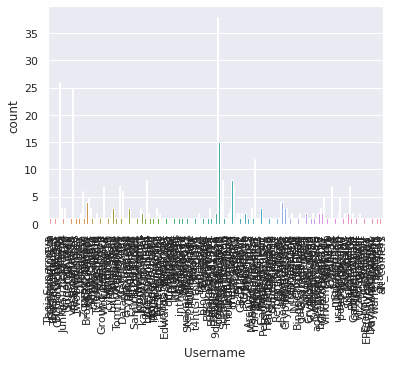

In [ ]:
sns.set(rc={'figure.figsize': (70, 20)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Username", data=tweets_df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [ ]:
tweets_df1["Username"].value_counts()

HoefnagelsBjorn    38
O2GBN              26
versemeta888       25
crypto_whispers    15
nsmtloudspeaker    12
                   ..
Al44130557          1
inthecryptolab      1
unboozled           1
sellitforbtc        1
alt_coiners         1
Name: Username, Length: 208, dtype: int64

In [ ]:
tweets_df1["Cleaned Text"]

0      [case, you’ve, missed, dopamine, rush, checkin...
1      [well, bought, nexo, 056, couple, day, ago, co...
2      [need, call, action, impending, disaster, nexo...
3      [woah, got, back, vacation, saw, nexo, 50, 😎, ...
4      [wilderworld, currently, breaking, back, suppo...
                             ...                        
453    [ray, 60, day, icx, 60, day, ach, 30, day, ❌so...
454    [rent, payment, service, provider, brings, ach...
455    [altcoiners, pump, dump, ach, 653⬆️, bal, 683⬆...
456    [maybe, ach, scam, theyve, fooled, industry, b...
457    [flashback, first, annual, meeting, washington...
Name: Cleaned Text, Length: 458, dtype: object

In [ ]:
df = df.sort_values(by=df["Date"])
df = df[df["Change"]>30]
for i in list(set(df["COIN"])):
    print(i)
    # dict(zip(i, values))

KeyError: 'Date'